**Start Spark session**

In [1]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("DiabetesAnalysis").getOrCreate()

**Read CSV files**

In [4]:
df_spark = spark.read.csv("Healthcare-Diabetes.csv", header=True, inferSchema=True)


**View Schema**

In [5]:
df_spark.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



**View First few Rows**

In [6]:
df_spark.show(5)


+---+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
| Id|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+---+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|  1|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|  2|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|  3|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|  4|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|  5|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+---+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



**Checking Missing values**

In [7]:
from pyspark.sql.functions import col, sum

df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns]).show()


+---+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
| Id|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+---+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|  0|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+---+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



**Replacing Missing value into 0**

In [8]:
from pyspark.sql.functions import when

df_spark = df_spark.withColumn("Insulin", when(df_spark.Insulin == 0, None).otherwise(df_spark.Insulin))
df_spark = df_spark.withColumn("SkinThickness", when(df_spark.SkinThickness == 0, None).otherwise(df_spark.SkinThickness))


**Summary statistic**

In [9]:
df_spark.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------------+------------------+-------------------+
|summary|               Id|       Pregnancies|           Glucose|     BloodPressure|     SkinThickness|           Insulin|              BMI|DiabetesPedigreeFunction|               Age|            Outcome|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------------+------------------+-------------------+
|  count|             2768|              2768|              2768|              2768|              1968|              1438|             2768|                    2768|              2768|               2768|
|   mean|           1384.5|3.7427745664739884|121.10260115606937| 69.13439306358381|29.289634146341463|154.23783031988873|32.13739161849709|     0.47119255780346847| 33.13222543352

**Check number of Diabetic and Non-Diabetic patients**

In [10]:
df_spark.groupBy("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  952|
|      0| 1816|
+-------+-----+



**Check Correlation Between Features & Diabetes Outcome**

In [11]:
from pyspark.sql.functions import corr

df_spark.select(corr("Glucose", "Outcome")).show()
df_spark.select(corr("BMI", "Outcome")).show()

+----------------------+
|corr(Glucose, Outcome)|
+----------------------+
|     0.460644476850666|
+----------------------+

+------------------+
|corr(BMI, Outcome)|
+------------------+
|0.2809275889940184|
+------------------+



**Data Visualization**

**Import Pandas,Matplotlib,Seaborn**

**Histogram Of Glucose Level**

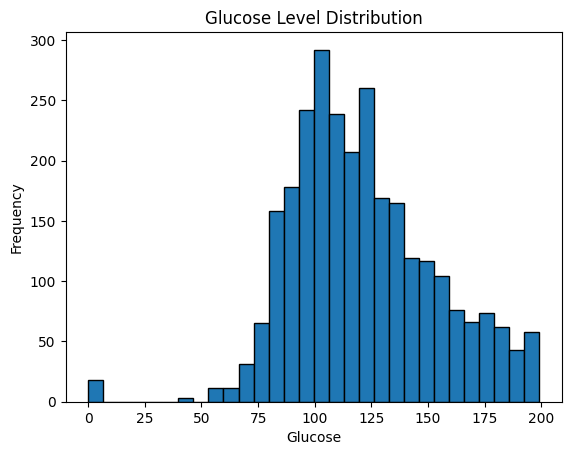

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_pandas = df_spark.toPandas()

# Histogram of Glucose Levels
plt.hist(df_pandas["Glucose"], bins=30, edgecolor="k")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Glucose Level Distribution")
plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


**Distribution of Glucose Levels**

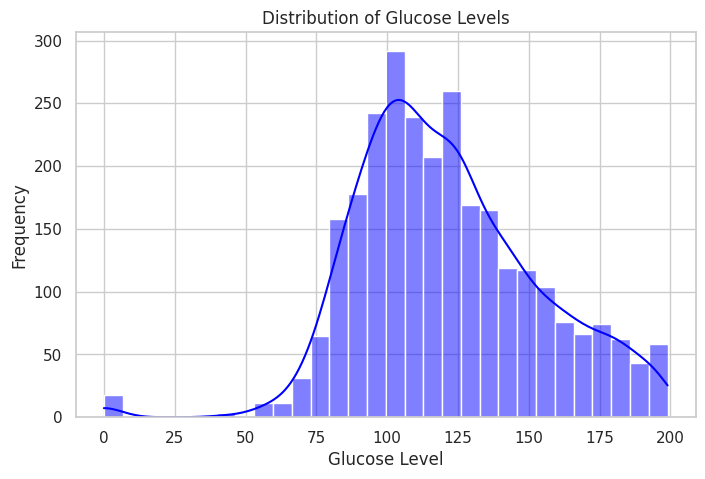

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df_pandas["Glucose"], bins=30, kde=True, color="blue")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Levels")
plt.show()


**Count of Diabetic vs Non-Diabetic Patients**

<ipython-input-16-29573ec54acf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df_pandas, palette="coolwarm")


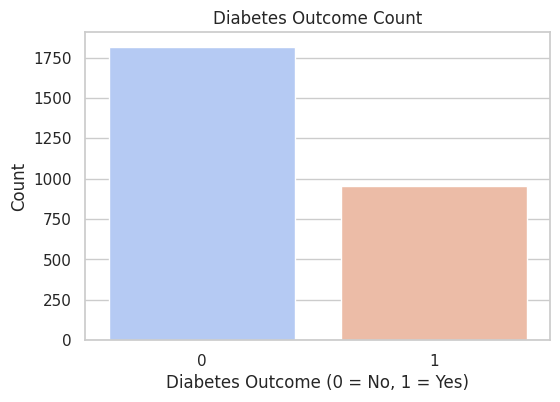

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df_pandas, palette="coolwarm")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Diabetes Outcome Count")
plt.show()

**Box Plot of BMI Across Diabetes Outcome**

<ipython-input-17-397127aa0f59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BMI", data=df_pandas, palette="Set2")


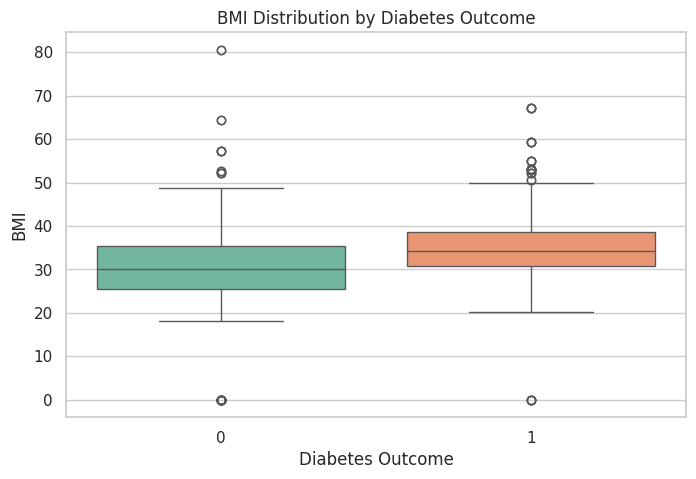

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="BMI", data=df_pandas, palette="Set2")
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.title("BMI Distribution by Diabetes Outcome")
plt.show()


**Pairplot Shows how multiple features interact based on diabetes status**

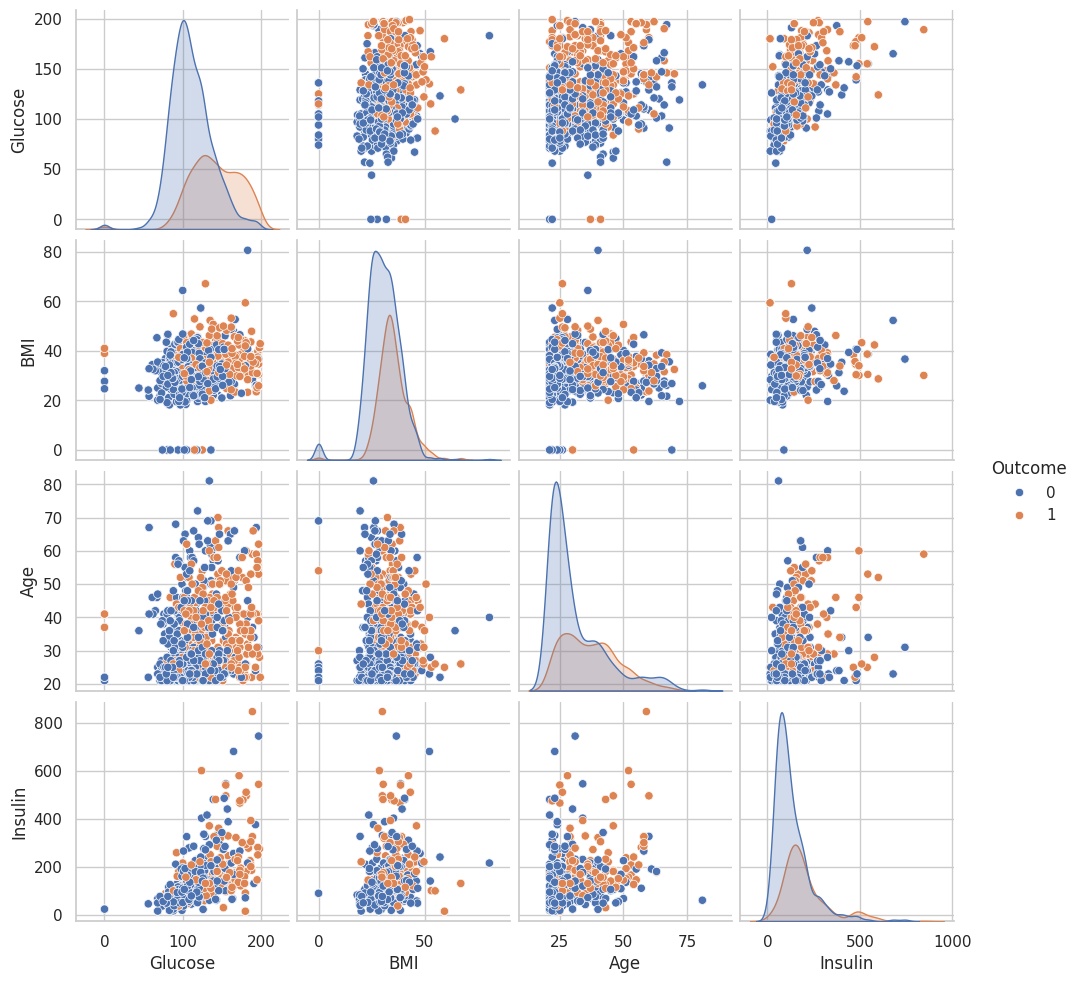

In [18]:
sns.pairplot(df_pandas, hue="Outcome", vars=["Glucose", "BMI", "Age", "Insulin"])
plt.show()

**Correlation Heatmap identify strongly related features**


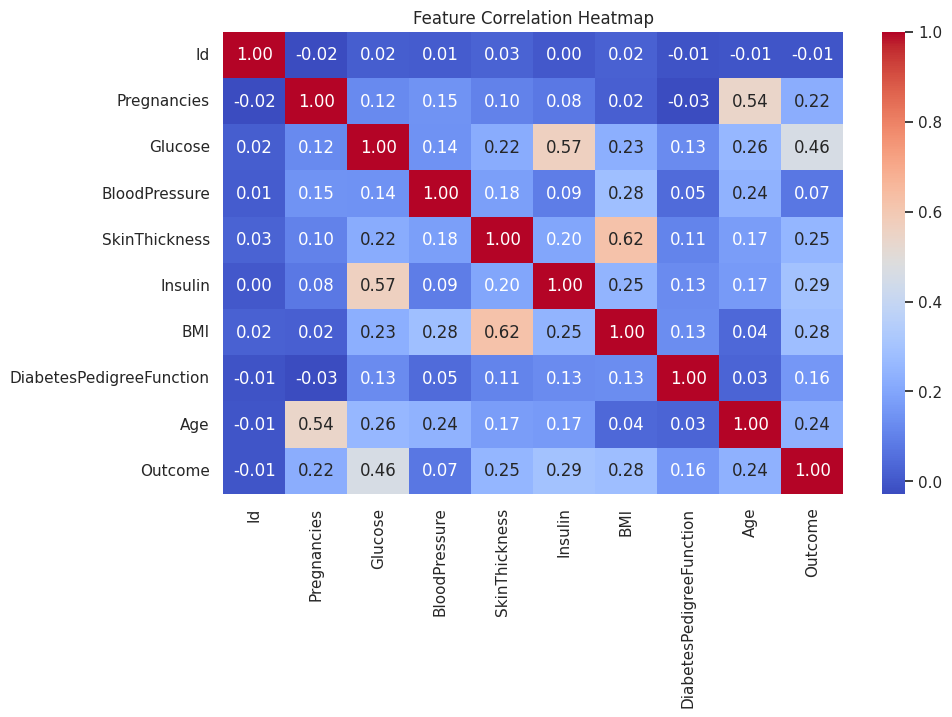

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df_pandas.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
